Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sci
import matplotlib.pyplot as plt

Load the FIFA data set

In [152]:
fifa_data = pd.read_csv('fifa.csv')

In [153]:
fifa_data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [154]:
fifa_data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [155]:
fifa_data.dtypes

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             

In [ ]:
#Dropping unwanted columns by copying only the required columns

In [156]:
df = fifa_data[['ID','Name','Age','Nationality','Overall','Potential','Value','Wage','International Reputation','Work Rate','Contract Valid Until','Joined','Height', 'Weight','Stamina','Strength','Release Clause','Position']].copy()

In [157]:
df

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,International Reputation,Work Rate,Contract Valid Until,Joined,Height,Weight,Stamina,Strength,Release Clause,Position
0,158023,L. Messi,31,Argentina,94,94,€110.5M,€565K,5.0,Medium/ Medium,2021,"Jul 1, 2004",5'7,159lbs,72.0,59.0,€226.5M,RF
1,20801,Cristiano Ronaldo,33,Portugal,94,94,€77M,€405K,5.0,High/ Low,2022,"Jul 10, 2018",6'2,183lbs,88.0,79.0,€127.1M,ST
2,190871,Neymar Jr,26,Brazil,92,93,€118.5M,€290K,5.0,High/ Medium,2022,"Aug 3, 2017",5'9,150lbs,81.0,49.0,€228.1M,LW
3,193080,De Gea,27,Spain,91,93,€72M,€260K,4.0,Medium/ Medium,2020,"Jul 1, 2011",6'4,168lbs,43.0,64.0,€138.6M,GK
4,192985,K. De Bruyne,27,Belgium,91,92,€102M,€355K,4.0,High/ High,2023,"Aug 30, 2015",5'11,154lbs,90.0,75.0,€196.4M,RCM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,€60K,€1K,1.0,Medium/ Medium,2019,"May 3, 2017",5'9,134lbs,40.0,47.0,€143K,CM
18203,243165,N. Christoffersson,19,Sweden,47,63,€60K,€1K,1.0,Medium/ Medium,2020,"Mar 19, 2018",6'3,170lbs,43.0,67.0,€113K,ST
18204,241638,B. Worman,16,England,47,67,€60K,€1K,1.0,Medium/ Medium,2021,"Jul 1, 2017",5'8,148lbs,55.0,32.0,€165K,ST
18205,246268,D. Walker-Rice,17,England,47,66,€60K,€1K,1.0,Medium/ Medium,2019,"Apr 24, 2018",5'10,154lbs,40.0,48.0,€143K,RW


#Converting the Columns for further analysis

1. Column Name = Value, 
   Details = Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.
   Required Output = Convert to Float after getting rid of currency symbol and suffix.

In [158]:
def val(sal):
    if sal[-1] == 'K':
        values = pd.to_numeric(sal[1:-1])
        values = values * 10000
    else:
        values = pd.to_numeric(sal[1:-1])
        values = values * 1000000
    return values    

In [159]:
#Converting K and M values using function val
df['Value'] = df['Value'].apply(val)

In [160]:
df['Value']

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202       600000.0
18203       600000.0
18204       600000.0
18205       600000.0
18206       600000.0
Name: Value, Length: 18207, dtype: float64

In [161]:
df['Value'].dtype

dtype('float64')

2. Column Name = 'Wage'
  Details = Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.
  Required Output = Convert to Float after getting rid of currency symbol and suffix.

In [162]:
df['Wage'] = df['Wage'].str.replace('€','').str.replace('M','').str.replace('K','').astype(float)

In [163]:
df['Wage'] = df['Wage']*1000

In [164]:
df

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,International Reputation,Work Rate,Contract Valid Until,Joined,Height,Weight,Stamina,Strength,Release Clause,Position
0,158023,L. Messi,31,Argentina,94,94,110500000.0,565000.0,5.0,Medium/ Medium,2021,"Jul 1, 2004",5'7,159lbs,72.0,59.0,€226.5M,RF
1,20801,Cristiano Ronaldo,33,Portugal,94,94,77000000.0,405000.0,5.0,High/ Low,2022,"Jul 10, 2018",6'2,183lbs,88.0,79.0,€127.1M,ST
2,190871,Neymar Jr,26,Brazil,92,93,118500000.0,290000.0,5.0,High/ Medium,2022,"Aug 3, 2017",5'9,150lbs,81.0,49.0,€228.1M,LW
3,193080,De Gea,27,Spain,91,93,72000000.0,260000.0,4.0,Medium/ Medium,2020,"Jul 1, 2011",6'4,168lbs,43.0,64.0,€138.6M,GK
4,192985,K. De Bruyne,27,Belgium,91,92,102000000.0,355000.0,4.0,High/ High,2023,"Aug 30, 2015",5'11,154lbs,90.0,75.0,€196.4M,RCM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,600000.0,1000.0,1.0,Medium/ Medium,2019,"May 3, 2017",5'9,134lbs,40.0,47.0,€143K,CM
18203,243165,N. Christoffersson,19,Sweden,47,63,600000.0,1000.0,1.0,Medium/ Medium,2020,"Mar 19, 2018",6'3,170lbs,43.0,67.0,€113K,ST
18204,241638,B. Worman,16,England,47,67,600000.0,1000.0,1.0,Medium/ Medium,2021,"Jul 1, 2017",5'8,148lbs,55.0,32.0,€165K,ST
18205,246268,D. Walker-Rice,17,England,47,66,600000.0,1000.0,1.0,Medium/ Medium,2019,"Apr 24, 2018",5'10,154lbs,40.0,48.0,€143K,RW


In [165]:
df['Wage'].dtype

dtype('float64')

3. Column Name = 'Joined' Details = Year as a string, in some cases complete date as stringrespectively. Required Output = Convert to int with only year

In [166]:
#Checking for Null values
df['Joined'].isnull().sum()/len(df)*100

8.529686384357664

In [167]:
#filling Nan values with mode imputation
df['Joined'].fillna(df.Joined.mode()[0],inplace=True)

In [168]:
#Checking for Null values after mode imputation
df['Joined'].isnull().sum()/len(df)*100

0.0

In [169]:
df['Joined'] = pd.DatetimeIndex(df['Joined']).year.astype(int)

In [170]:
#checking the type for Joined column
df['Joined'].dtype

dtype('int64')

4 Column Name = 'Contract Valid Until'
Details = Date as a string 
Required Output = Convert to datetime type

In [171]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

In [172]:
df['Contract Valid Until'].dtype

dtype('<M8[ns]')

In [173]:
df

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,International Reputation,Work Rate,Contract Valid Until,Joined,Height,Weight,Stamina,Strength,Release Clause,Position
0,158023,L. Messi,31,Argentina,94,94,110500000.0,565000.0,5.0,Medium/ Medium,2021-01-01,2004,5'7,159lbs,72.0,59.0,€226.5M,RF
1,20801,Cristiano Ronaldo,33,Portugal,94,94,77000000.0,405000.0,5.0,High/ Low,2022-01-01,2018,6'2,183lbs,88.0,79.0,€127.1M,ST
2,190871,Neymar Jr,26,Brazil,92,93,118500000.0,290000.0,5.0,High/ Medium,2022-01-01,2017,5'9,150lbs,81.0,49.0,€228.1M,LW
3,193080,De Gea,27,Spain,91,93,72000000.0,260000.0,4.0,Medium/ Medium,2020-01-01,2011,6'4,168lbs,43.0,64.0,€138.6M,GK
4,192985,K. De Bruyne,27,Belgium,91,92,102000000.0,355000.0,4.0,High/ High,2023-01-01,2015,5'11,154lbs,90.0,75.0,€196.4M,RCM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,600000.0,1000.0,1.0,Medium/ Medium,2019-01-01,2017,5'9,134lbs,40.0,47.0,€143K,CM
18203,243165,N. Christoffersson,19,Sweden,47,63,600000.0,1000.0,1.0,Medium/ Medium,2020-01-01,2018,6'3,170lbs,43.0,67.0,€113K,ST
18204,241638,B. Worman,16,England,47,67,600000.0,1000.0,1.0,Medium/ Medium,2021-01-01,2017,5'8,148lbs,55.0,32.0,€165K,ST
18205,246268,D. Walker-Rice,17,England,47,66,600000.0,1000.0,1.0,Medium/ Medium,2019-01-01,2018,5'10,154lbs,40.0,48.0,€143K,RW


5. Column Name = 'Height' Details = In inches with a quotation mark Required Output = Convert to Float with decimal points

In [174]:
df['Height'] = df['Height'].str.replace("\'",'.').astype(float)

In [175]:
df['Height'].dtypes

dtype('float64')

6. Column Name = 'Weight' Details = Contains the suffix lbs Required Output = Remove the suffix and convert to float

In [176]:
df['Weight'] = df['Weight'].str.replace('lbs','').astype(float)

In [177]:
df['Height'].dtypes

dtype('float64')

7. Column Name = 'Release Clause' Details = Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively. Required Output = Convert to Float after getting rid of currency symbol and suffix.

In [188]:
df['Release Clause'].astype(object)

0        €226.5M
1        €127.1M
2        €228.1M
3        €138.6M
4        €196.4M
          ...   
18202      €143K
18203      €113K
18204      €165K
18205      €143K
18206      €165K
Name: Release Clause, Length: 18207, dtype: object

In [236]:
c=[]
for i in df['Release Clause']:
    if isinstance(i,float)==False:
        if i[-1]=='M':
            m = float(i[1:-1])
            f = m*1000000
            c.append(f)
        elif i[-1]=='K':
            k = float(i[1:-1])
            j = k*1000
            c.append(j)
        else:
            j=float(i[1:])
            c.append(j)
    else:
        c.append(i)
m=np.array(c)
df['Release Clause']=m
df['Release Clause'].fillna(df['Release Clause'].mean(),inplace=True)

In [237]:
df['Release Clause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float64

Check for missing values and do a mean imputation where necessary

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Value                     17955 non-null  float64       
 7   Wage                      18207 non-null  float64       
 8   International Reputation  18159 non-null  float64       
 9   Work Rate                 18159 non-null  object        
 10  Contract Valid Until      17918 non-null  datetime64[ns]
 11  Joined                    18207 non-null  int64         
 12  Height            

Mean Imputation for required columns

In [29]:
df['International Reputation'].fillna(df['International Reputation'].mean(),inplace=True)

In [30]:
df.dtypes

ID                                   int64
Name                                object
Age                                  int64
Nationality                         object
Overall                              int64
Potential                            int64
Value                              float64
Wage                               float64
International Reputation           float64
Work Rate                           object
Contract Valid Until        datetime64[ns]
Joined                               int64
Height                             float64
Weight                             float64
Stamina                            float64
Strength                           float64
Release Clause                     float64
Position                            object
dtype: object

In [31]:
df['Work Rate'].fillna(df['Work Rate'].mode()[0],inplace=True)

In [32]:
df['Contract Valid Until'].fillna(df['Contract Valid Until'].mode()[0],inplace=True)

In [33]:
df['Height'].fillna(df['Height'].mean(),inplace=True)

In [34]:
df['Weight'].fillna(df['Weight'].mean(),inplace=True)

In [35]:
df['Stamina'].fillna(df['Stamina'].mean(),inplace=True)

In [36]:
df['Strength'].fillna(df['Strength'].mean(),inplace=True)

In [37]:
df['Release Clause'].fillna(df['Release Clause'].mean(),inplace=True)

In [ ]:
df['Po'].fillna(df['Strength'].mean(),inplace=True)

In [219]:
df['Position'].fillna(df['Position'].mode()[0],inplace=True)

#Exploratory Analysis:

1. Plot the distribution of Overall rating for all players

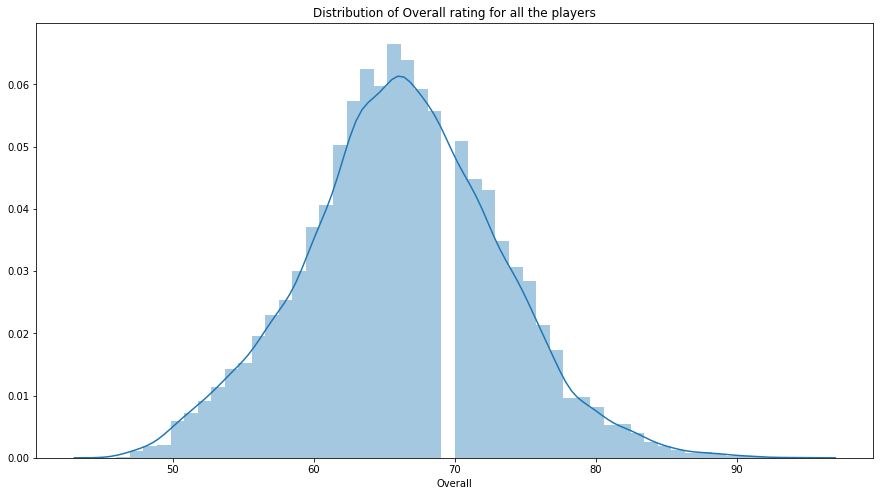

In [249]:
plt.figure(figsize=(15,8))
sns.distplot(a=df['Overall'])
plt.title('Distribution of Overall rating for all the players')
plt.savefig('EDA 1')

2. 2.Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

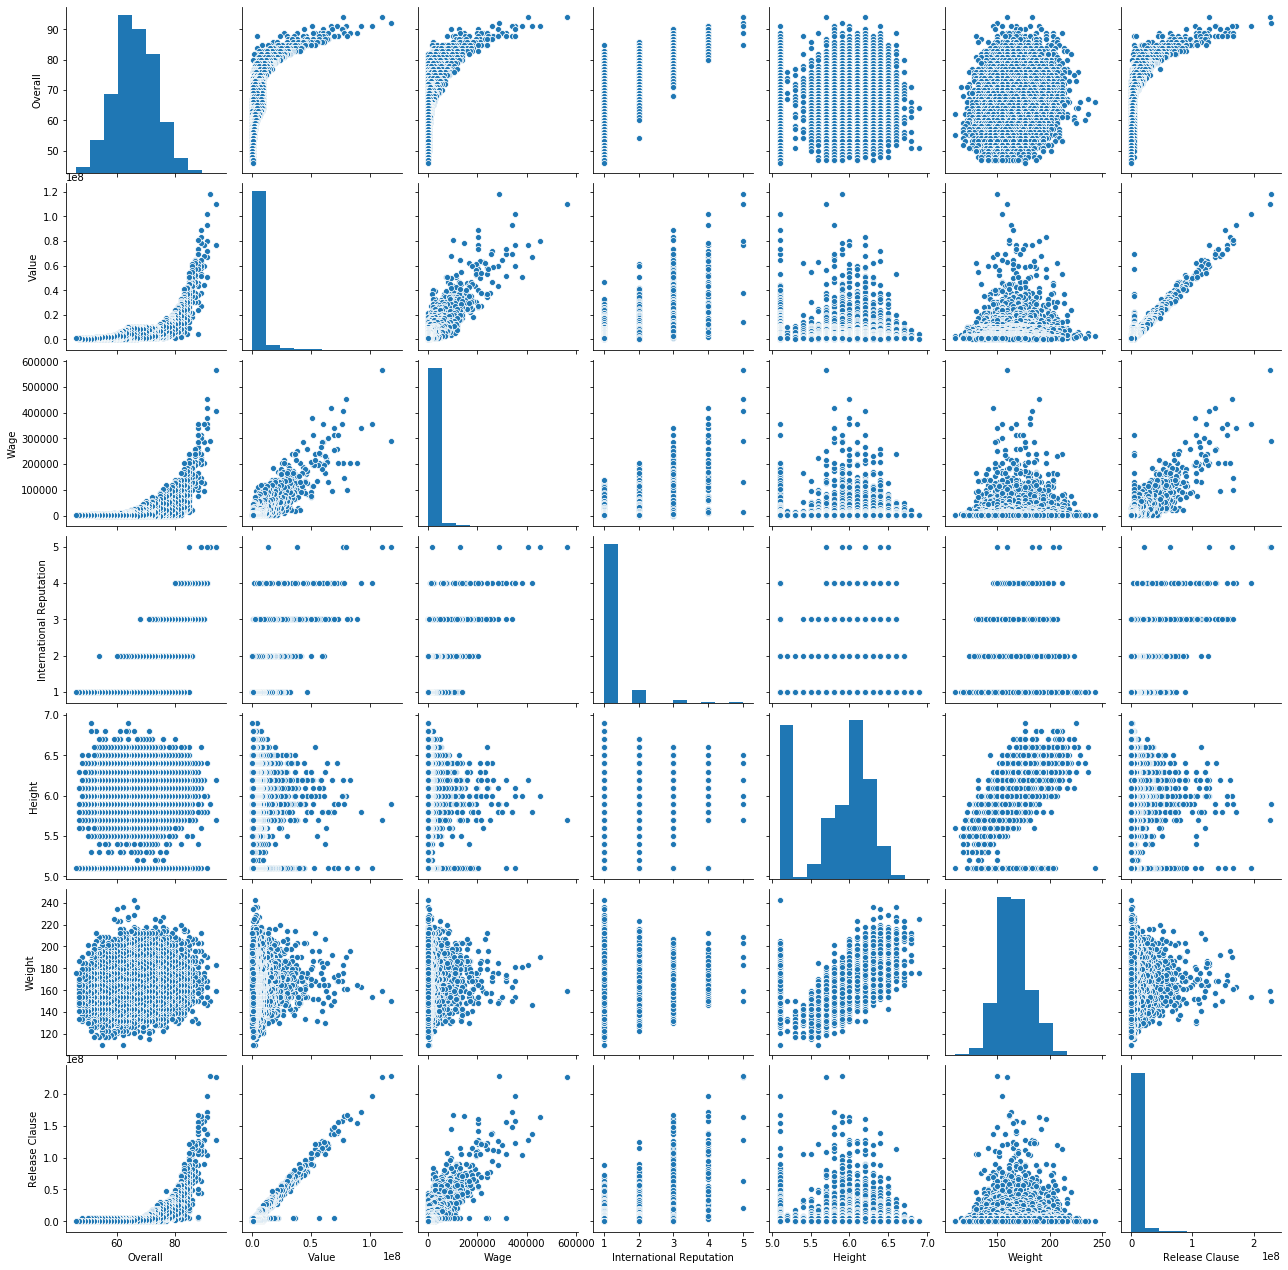

In [244]:
sns.pairplot(df[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']])
plt.savefig('EDA 2')

3.Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [39]:
df

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,International Reputation,Work Rate,Contract Valid Until,Joined,Height,Weight,Stamina,Strength,Release Clause,Position
0,158023,L. Messi,31,Argentina,94,94,110.5,565.0,5.0,Medium/ Medium,2021-01-01,2004,5.70,159.0,72.0,59.0,226.5,RF
1,20801,Cristiano Ronaldo,33,Portugal,94,94,77.0,405.0,5.0,High/ Low,2022-01-01,2018,6.20,183.0,88.0,79.0,127.1,ST
2,190871,Neymar Jr,26,Brazil,92,93,118.5,290.0,5.0,High/ Medium,2022-01-01,2017,5.90,150.0,81.0,49.0,228.1,LW
3,193080,De Gea,27,Spain,91,93,72.0,260.0,4.0,Medium/ Medium,2020-01-01,2011,6.40,168.0,43.0,64.0,138.6,GK
4,192985,K. De Bruyne,27,Belgium,91,92,102.0,355.0,4.0,High/ High,2023-01-01,2015,5.11,154.0,90.0,75.0,196.4,RCM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,60.0,1.0,1.0,Medium/ Medium,2019-01-01,2017,5.90,134.0,40.0,47.0,143.0,CM
18203,243165,N. Christoffersson,19,Sweden,47,63,60.0,1.0,1.0,Medium/ Medium,2020-01-01,2018,6.30,170.0,43.0,67.0,113.0,ST
18204,241638,B. Worman,16,England,47,67,60.0,1.0,1.0,Medium/ Medium,2021-01-01,2017,5.80,148.0,55.0,32.0,165.0,ST
18205,246268,D. Walker-Rice,17,England,47,66,60.0,1.0,1.0,Medium/ Medium,2019-01-01,2018,5.10,154.0,40.0,48.0,143.0,RW


In [42]:
df_20 = df[(df['Contract Valid Until'] == '01-01-2020')].sort_values(by = 'Overall',ascending = False).head(20)

In [43]:
df_20

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,International Reputation,Work Rate,Contract Valid Until,Joined,Height,Weight,Stamina,Strength,Release Clause,Position
3,193080,De Gea,27,Spain,91,93,72.0,260.0,4.0,Medium/ Medium,2020-01-01,2011,6.40,168.0,43.0,64.0,138.6,GK
6,177003,L. Modrić,32,Croatia,91,91,67.0,420.0,4.0,High/ High,2020-01-01,2012,5.80,146.0,89.0,58.0,137.4,RCM
8,155862,Sergio Ramos,32,Spain,91,91,51.0,380.0,4.0,High/ Medium,2020-01-01,2005,6.00,181.0,84.0,83.0,104.6,RCB
5,183277,E. Hazard,27,Belgium,91,91,93.0,340.0,4.0,High/ Medium,2020-01-01,2012,5.80,163.0,83.0,66.0,172.1,LF
13,168542,David Silva,32,Spain,90,90,60.0,285.0,4.0,High/ Medium,2020-01-01,2010,5.80,148.0,78.0,52.0,111.0,LCM
21,179813,E. Cavani,31,Uruguay,89,89,60.0,200.0,4.0,High/ High,2020-01-01,2013,6.10,170.0,92.0,78.0,111.0,LS
24,138956,G. Chiellini,33,Italy,89,89,27.0,215.0,4.0,Medium/ High,2020-01-01,2005,6.20,187.0,65.0,89.0,44.6,LCB
31,190460,C. Eriksen,26,Denmark,88,91,73.5,205.0,3.0,High/ Medium,2020-01-01,2013,5.11,168.0,92.0,58.0,141.5,CAM
39,164240,Thiago Silva,33,Brazil,88,88,24.0,165.0,4.0,Medium/ High,2020-01-01,2012,6.00,181.0,74.0,82.0,44.4,RCB
50,175943,D. Mertens,31,Belgium,87,87,45.0,135.0,3.0,High/ Low,2020-01-01,2013,5.70,134.0,75.0,42.0,76.5,RF


a)What would the average wage for this set of players be?

In [248]:
df_20['Wage'].mean()

205.45

b)What is the average age?

In [46]:
df_20['Age'].mean()

30.65

c)Is there a correlation between the Overall rating and Value for these players?

In [260]:
corr = df.loc[:,['Value','Overall']].corr()
corr

,Value,Overall
Value,1.000000,0.534645
Overall,0.534645,1.000000


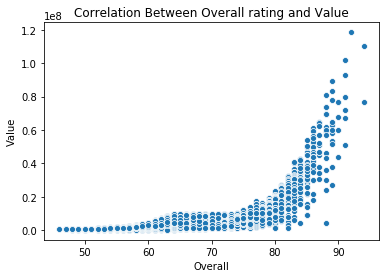

In [261]:
sns.scatterplot(df['Overall'],df['Value'])
plt.title('Correlation Between Overall rating and Value')
plt.savefig('Scatter')

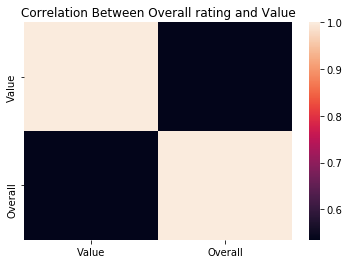

In [262]:
sns.heatmap(corr)
plt.title('Correlation Between Overall rating and Value')
plt.savefig('Heat_map')

4. Generate tables containing the top 5 players by Overall rating for each unique position.

In [205]:
df['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [231]:
df_5 = df.groupby('Position')['Position','Overall','Name','Wage'].head(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [232]:
df_5

,Position,Overall,Name,Wage
0,RF,94,L. Messi,565000.0
1,ST,94,Cristiano Ronaldo,405000.0
2,LW,92,Neymar Jr,290000.0
3,GK,91,De Gea,260000.0
4,RCM,91,K. De Bruyne,355000.0
...,...,...,...,...
1774,RF,75,C. Ciano,17000.0
2242,RAM,74,Jacson Zonta,13000.0
2247,LAM,74,Leo Caldeirinha,13000.0
2322,RAM,74,Sebas Couteira,14000.0


a) Are there any players appearing in more than one Table. Please point out such players.

In [229]:
players = df['Name'].value_counts()
players[players>1]

J. Rodríguez    11
Paulinho         8
R. Williams      7
J. Williams      7
J. Valencia      6
                ..
A. Collins       2
A. Ajeti         2
A. Jones         2
M. Wittek        2
J. Hunt          2
Name: Name, Length: 762, dtype: int64

b) What is the average wage one can expect to pay for the top 5 in every position?

In [245]:
df_5_wage = df_5.groupby('Position')[['Wage']].mean()

In [263]:
df_5_wage

,Wage
Position,
CAM,174000.0
CB,139600.0
CDM,217000.0
CF,47400.0
CM,130600.0
GK,192800.0
LAM,81600.0
LB,177200.0
LCB,162000.0
